In [232]:
# Importing all the libraries and changing the working directory
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import math
import numpy as np
%matplotlib inline
os.chdir('D:/OneDrive - NOAH DATA PVT LTD/New Volume/Personal/Cars24')

In [233]:
# Reading the data in csv file
df = pd.read_csv('engine_data.csv')

C:\Users\Indium Software\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (21,32,33,60) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
# Preliminary investigation of data shape and size
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
appointmentId                                                26307 non-null object
inspectionStartTime                                          26307 non-null object
year                                                         26307 non-null int64
month                                                        26307 non-null int64
engineTransmission_battery_value                             26307 non-null object
engineTransmission_battery_cc_value_0                        3438 non-null object
engineTransmission_battery_cc_value_1                        430 non-null object
engineTransmission_battery_cc_value_2                        72 non-null object
engineTransmission_battery_cc_value_3                        16 non-null object
engineTransmission_battery_cc_value_4                        4 non-null object
engineTransmission_engineoilLevelDipstick_value              26307 non-null 

In [13]:
# Checking the unique values of the rating. Fixed number of unique ratings indicating that this rating can be formulated as a 
#classification problem
df['rating_engineTransmission'].unique()

array([3. , 4. , 3.5, 4.5, 5. , 1. , 2. , 2.5, 1.5, 0.5])

In [16]:
df['inspectionStartTime'].head()

0     2/3/2019 15:43
1    1/16/2019 13:02
2     2/9/2019 13:31
3    1/18/2019 11:02
4    1/27/2019 12:12
Name: inspectionStartTime, dtype: object

In [34]:
# Converting inspection time to datetime object and creating inspection year and month
fdt = lambda x: datetime.strptime(x,'%m/%d/%Y %H:%M')
fyr = lambda x: x.year
fmth = lambda x: x.month
df['inspectionStartTimedt'] = df['inspectionStartTime'].apply(fdt)
df['inspectionStartYear'] = df['inspectionStartTimedt'].apply(fyr)
df['inspectionStartMonth'] = df['inspectionStartTimedt'].apply(fmth)

In [318]:
# Function to calculate engine age in months at the time of inspection
def engine_age(y1,m1,y2,m2):
    age = 0
    if m2>m1:
        age = ((y1-y2)-1)*12 + ((12+m1)-m2)
    if m1>m2:
        age = (y1-y2)*12 + (m1-m2)
    return age
        

In [63]:
# Applying the function to calculate the engine age
df['eng_age_mth'] = df.apply(lambda x: engine_age(x['inspectionStartYear'], x['inspectionStartMonth'], x['year'], x['month']),axis=1)

Text(0, 0.5, 'Frequency')

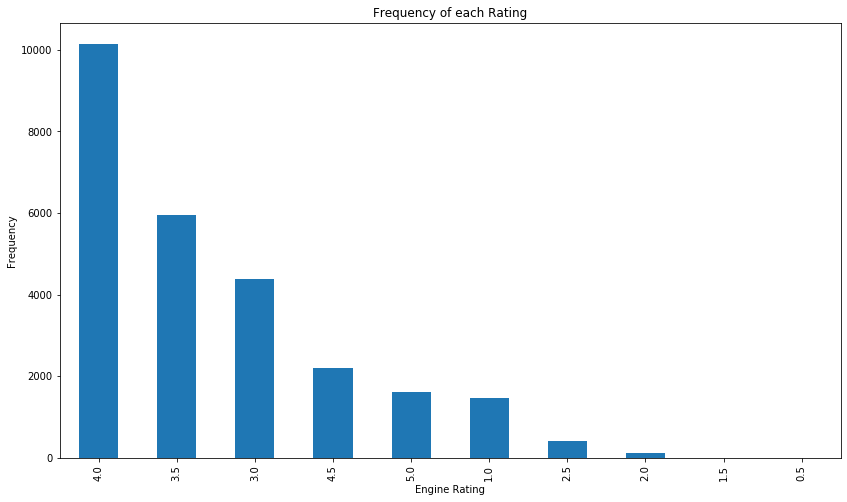

In [45]:
# PLotting frequency of each rating
# Too small ratings e.g. 0.5, 1.5, 2.0 etc. happens very few times

ax = df['rating_engineTransmission'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency of each Rating")
ax.set_xlabel("Engine Rating")
ax.set_ylabel("Frequency")

In [64]:
min_b = math.floor(np.min(df.loc[:,'eng_age_mth']))
max_b = math.ceil(np.max(df.loc[:,'eng_age_mth']))
bins = np.linspace(min_b, max_b, 20)

Text(0, 0.5, 'Frequency')

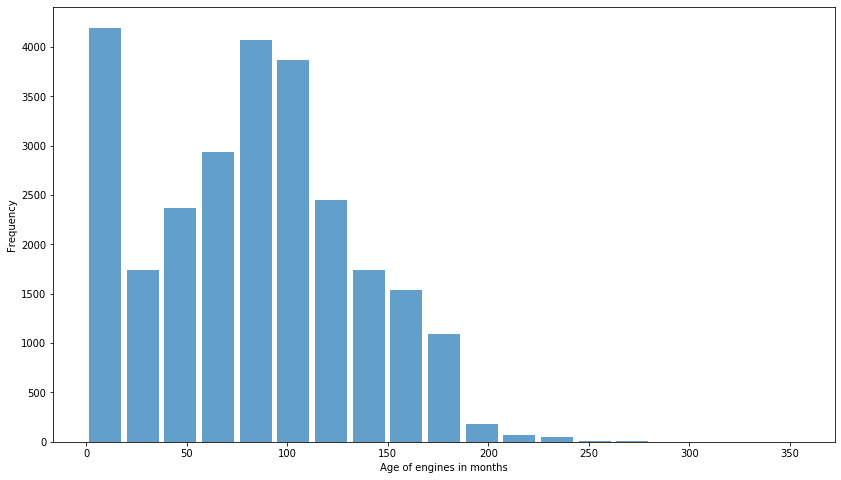

In [79]:
# PLotting frequency of engine ages
# Very few engines have ages >200 months
plt.figure(figsize=[14,8])
plt.hist(x=df['eng_age_mth'],bins = bins, alpha = 0.7, rwidth = .85)
plt.xlabel("Age of engines in months")
plt.ylabel("Frequency")
plt.title('Frequency of Engine Ages')

In [77]:
# Checking the number of outliers
df[df['eng_age_mth']>230]

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission,inspectionStartTimedt,inspectionStartYear,inspectionStartMonth,eng_age_mth
195,aj_196,2/19/2019 16:50,1998,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,1809,1.0,2019-02-19 16:50:00,2019,2,253
635,aj_636,4/1/2019 17:27,1999,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,55833,1.0,2019-04-01 17:27:00,2019,4,243
1596,aj_1597,3/3/2019 14:35,1997,12,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,81457,1.0,2019-03-03 14:35:00,2019,3,255
1836,aj_1837,4/3/2019 17:27,1999,6,No,Not Working,NaN,NaN,NaN,NaN,...,"Car not in running condition, towing required",Radiator Fan not working,Starter Motor / Solenoid malfunctioning,Petrol,90950,1.0,2019-04-03 17:27:00,2019,4,238
1860,aj_1861,4/14/2019 18:34,2000,1,No,Not Working,Jump Start,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,84073,1.0,2019-04-14 18:34:00,2019,4,231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24947,aj_24948,2/19/2019 11:38,1995,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,64414,1.0,2019-02-19 11:38:00,2019,2,289
25228,aj_25229,3/27/2019 11:52,1998,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,59938,1.0,2019-03-27 11:52:00,2019,3,254
25287,aj_25288,3/20/2019 14:03,1999,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,52411,1.0,2019-03-20 14:03:00,2019,3,242
25529,aj_25530,4/9/2019 19:19,1995,1,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Petrol,31302,1.0,2019-04-09 19:19:00,2019,4,291


In [83]:
df['eng_age_cat'] = pd.cut(df['eng_age_mth'], 4, labels=["new", "medium", "old","vintage"])
pivot_df = pd.pivot_table(df, index='eng_age_cat', columns='rating_engineTransmission', values='year',aggfunc = lambda x:x.count())
pivot_df

rating_engineTransmission,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
eng_age_cat,,,,,,,,,,
new,NaN,368.0,3.0,35.0,139.0,1734.0,2802.0,6087.0,1800.0,1542.0
medium,NaN,470.0,3.0,78.0,280.0,2614.0,3103.0,4022.0,407.0,81.0
old,1.0,611.0,NaN,4.0,1.0,31.0,39.0,43.0,2.0,NaN
vintage,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
pd.cut(df['eng_age_mth'], 4).unique()

[(89.0, 178.0], (-0.356, 89.0], (178.0, 267.0], (267.0, 356.0]]
Categories (4, interval[float64]): [(-0.356, 89.0] < (89.0, 178.0] < (178.0, 267.0] < (267.0, 356.0]]

In [57]:
pivot_df = pd.pivot_table(df, index='fuel_type', columns='rating_engineTransmission', values='year',aggfunc = lambda x:x.count())
pivot_df

rating_engineTransmission,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
fuel_type,,,,,,,,,,
Diesel,NaN,489.0,4.0,29.0,112.0,1434.0,2239.0,4237.0,832.0,519.0
Electric,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN
Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0
Petrol,NaN,748.0,NaN,35.0,121.0,1484.0,2105.0,4129.0,1142.0,955.0
Petrol + CNG,1.0,215.0,2.0,52.0,185.0,1443.0,1588.0,1765.0,229.0,147.0
Petrol + LPG,NaN,4.0,NaN,NaN,2.0,18.0,11.0,21.0,2.0,1.0


In [58]:
pivot_df = pd.pivot_table(df, index='engineTransmission_battery_value', columns='rating_engineTransmission', values='year',aggfunc = lambda x:x.count())
pivot_df

rating_engineTransmission,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
engineTransmission_battery_value,,,,,,,,,,
No,NaN,247.0,5.0,51.0,110.0,944.0,876.0,1107.0,88.0,10.0
Yes,1.0,1209.0,1.0,66.0,310.0,3435.0,5068.0,9045.0,2121.0,1613.0


Text(0.5, 1.0, 'Frequency of Odometer Readings')

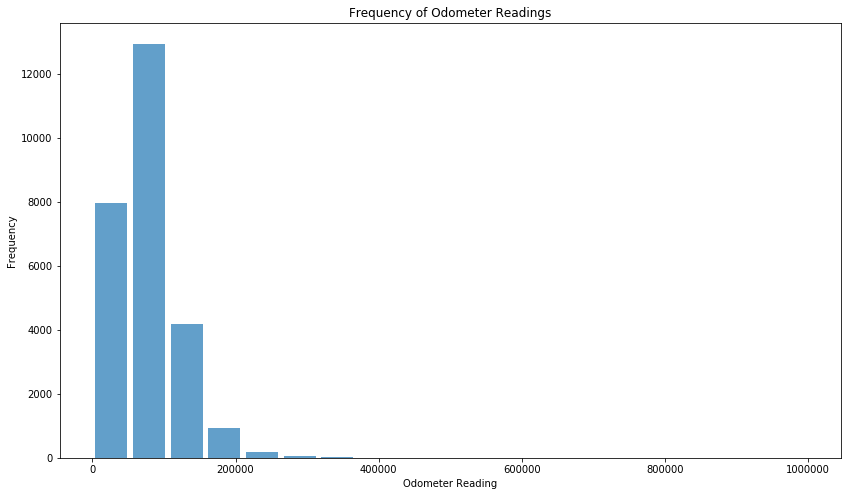

In [88]:
min_b = math.floor(np.min(df.loc[:,'odometer_reading']))
max_b = math.ceil(np.max(df.loc[:,'odometer_reading']))
bins = np.linspace(min_b, max_b, 20)

# PLotting frequency of engine ages
# Very few engines have ages >200 months
plt.figure(figsize=[14,8])
plt.hist(x=df['odometer_reading'],bins = bins, alpha = 0.7, rwidth = .85)
plt.xlabel("Odometer Reading")
plt.ylabel("Frequency")
plt.title('Frequency of Odometer Readings')

In [90]:
df[df['odometer_reading']>300000]

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission,inspectionStartTimedt,inspectionStartYear,inspectionStartMonth,eng_age_mth,eng_age_cat
737,aj_738,4/5/2019 12:27,2005,8,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diesel,329645,1.0,2019-04-05 12:27:00,2019,4,164,medium
1212,aj_1213,2/13/2019 18:58,2004,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Petrol + CNG,834666,1.0,2019-02-13 18:58:00,2019,2,181,old
1677,aj_1678,1/3/2019 12:43,2013,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diesel,361193,3.5,2019-01-03 12:43:00,2019,1,66,new
2543,aj_2544,1/13/2019 14:59,2003,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Petrol,999999,1.0,2019-01-13 14:59:00,2019,1,0,new
2946,aj_2947,2/4/2019 17:34,2005,9,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diesel,311013,1.0,2019-02-04 17:34:00,2019,2,161,medium
3435,aj_3436,3/25/2019 13:00,2007,4,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Petrol + CNG,743293,3.0,2019-03-25 13:00:00,2019,3,143,medium
5398,aj_5399,3/26/2019 15:30,2011,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diesel,358428,3.0,2019-03-26 15:30:00,2019,3,98,medium
6474,aj_6475,3/16/2019 11:07,2006,4,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diesel,327601,1.0,2019-03-16 11:07:00,2019,3,155,medium
6649,aj_6650,1/18/2019 17:38,2005,9,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Diesel,417750,1.0,2019-01-18 17:38:00,2019,1,160,medium
7415,aj_7416,1/15/2019 17:27,2004,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Petrol + CNG,993995,1.0,2019-01-15 17:27:00,2019,1,0,new


In [140]:
vals = list(df['engineTransmission_engineOil_cc_value_0'].unique())
vals

['Leaking',
 'Dirty',
 nan,
 'Level Low',
 'Leakage from Turbo Charger',
 'Leakage from Tappet Cover',
 'Leakage from Side cover',
 'Leakage from Sump/chamber',
 'Low Pressure warning light glowing',
 'Mixed with Coolant']

In [234]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_Dirty = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Dirty") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Dirty"):
        engineTransmission_engineOil_cc_value_Dirty.append(1)
    else:
        engineTransmission_engineOil_cc_value_Dirty.append(0)

In [235]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_Leaking = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Leaking") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Leaking"):
        engineTransmission_engineOil_cc_value_Leaking.append(1)
    else:
        engineTransmission_engineOil_cc_value_Leaking.append(0)

In [236]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_LL = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Level Low") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Level Low"):
        engineTransmission_engineOil_cc_value_LL.append(1)
    else:
        engineTransmission_engineOil_cc_value_LL.append(0)

In [237]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_LTRC = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Leakage from Turbo Charger") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Leakage from Turbo Charger"):
        engineTransmission_engineOil_cc_value_LTRC.append(1)
    else:
        engineTransmission_engineOil_cc_value_LTRC.append(0)

In [238]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_LTAC = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Leakage from Tappet Cover") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Leakage from Tappet Cover"):
        engineTransmission_engineOil_cc_value_LTAC.append(1)
    else:
        engineTransmission_engineOil_cc_value_LTAC.append(0)

In [239]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_LSC = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Leakage from Side cover") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Leakage from Side cover"):
        engineTransmission_engineOil_cc_value_LSC.append(1)
    else:
        engineTransmission_engineOil_cc_value_LSC.append(0)

In [240]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_LSUC = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Leakage from Sump/chamber") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Leakage from Sump/chamber"):
        engineTransmission_engineOil_cc_value_LSUC.append(1)
    else:
        engineTransmission_engineOil_cc_value_LSUC.append(0)

In [241]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_LPLG = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Low Pressure warning light glowing") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Low Pressure warning light glowing"):
        engineTransmission_engineOil_cc_value_LPLG.append(1)
    else:
        engineTransmission_engineOil_cc_value_LPLG.append(0)

In [242]:
#Converting Engine Transmission Oil CC values to dummy variables
engineTransmission_engineOil_cc_value_MC = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineOil_cc_value_0'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_1'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_2'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_3'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_4'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_5'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_6'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_7'] == "Mixed with Coolant") or (row[1]['engineTransmission_engineOil_cc_value_8'] == "Mixed with Coolant"):
        engineTransmission_engineOil_cc_value_MC.append(1)
    else:
        engineTransmission_engineOil_cc_value_MC.append(0)
    

In [243]:
df['engineTransmission_engineOil_cc_value_Dirty'] = engineTransmission_engineOil_cc_value_Dirty
df['engineTransmission_engineOil_cc_value_Leaking'] = engineTransmission_engineOil_cc_value_Leaking
df['engineTransmission_engineOil_cc_value_LL'] = engineTransmission_engineOil_cc_value_LL
df['engineTransmission_engineOil_cc_value_LTRC'] = engineTransmission_engineOil_cc_value_LTRC
df['engineTransmission_engineOil_cc_value_LTAC'] = engineTransmission_engineOil_cc_value_LTAC
df['engineTransmission_engineOil_cc_value_LSC'] = engineTransmission_engineOil_cc_value_LSC
df['engineTransmission_engineOil_cc_value_LSUC'] = engineTransmission_engineOil_cc_value_LSUC
df['engineTransmission_engineOil_cc_value_LPLG'] = engineTransmission_engineOil_cc_value_LPLG
df['engineTransmission_engineOil_cc_value_MC'] = engineTransmission_engineOil_cc_value_MC

In [244]:
df.drop(['engineTransmission_engineOil_cc_value_0','engineTransmission_engineOil_cc_value_1','engineTransmission_engineOil_cc_value_2','engineTransmission_engineOil_cc_value_3','engineTransmission_engineOil_cc_value_4','engineTransmission_engineOil_cc_value_5','engineTransmission_engineOil_cc_value_6','engineTransmission_engineOil_cc_value_7','engineTransmission_engineOil_cc_value_8'],axis=1,inplace=True)

In [170]:
df['engineTransmission_engineSound_cc_value_0'].unique()

array(['Alternator Brg Noise', 'Timing Noise', nan, 'Tappet Noise',
       'Injector Noise', 'Engine Auxiliary Noise',
       'Whistling Noise-Turbo', 'Water Pump Brg Noise'], dtype=object)

In [245]:
#Converting Engine Transmission Sound CC values to dummy variables
engineTransmission_engineSound_cc_value_ABN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineSound_cc_value_0'] == "Alternator Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_1'] == "Alternator Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_2'] == "Alternator Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_3'] == "Alternator Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_4'] == "Alternator Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_5'] == "Alternator Brg Noise"):
        engineTransmission_engineSound_cc_value_ABN.append(1)
    else:
        engineTransmission_engineSound_cc_value_ABN.append(0)

In [246]:
#Converting Engine Transmission Sound CC values to dummy variables
engineTransmission_engineSound_cc_value_TN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineSound_cc_value_0'] == "Timing Noise") or (row[1]['engineTransmission_engineSound_cc_value_1'] == "Timing Noise") or (row[1]['engineTransmission_engineSound_cc_value_2'] == "Timing Noise") or (row[1]['engineTransmission_engineSound_cc_value_3'] == "Timing Noise") or (row[1]['engineTransmission_engineSound_cc_value_4'] == "Timing Noise") or (row[1]['engineTransmission_engineSound_cc_value_5'] == "Timing Noise"):
        engineTransmission_engineSound_cc_value_TN.append(1)
    else:
        engineTransmission_engineSound_cc_value_TN.append(0)

In [247]:
#Converting Engine Transmission Sound CC values to dummy variables
engineTransmission_engineSound_cc_value_TAN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineSound_cc_value_0'] == "Tappet Noise") or (row[1]['engineTransmission_engineSound_cc_value_1'] == "Tappet Noise") or (row[1]['engineTransmission_engineSound_cc_value_2'] == "Tappet Noise") or (row[1]['engineTransmission_engineSound_cc_value_3'] == "Tappet Noise") or (row[1]['engineTransmission_engineSound_cc_value_4'] == "Tappet Noise") or (row[1]['engineTransmission_engineSound_cc_value_5'] == "Tappet Noise"):
        engineTransmission_engineSound_cc_value_TAN.append(1)
    else:
        engineTransmission_engineSound_cc_value_TAN.append(0)

In [248]:
#Converting Engine Transmission Sound CC values to dummy variables
engineTransmission_engineSound_cc_value_IN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineSound_cc_value_0'] == "Injector Noise") or (row[1]['engineTransmission_engineSound_cc_value_1'] == "Injector Noise") or (row[1]['engineTransmission_engineSound_cc_value_2'] == "Injector Noise") or (row[1]['engineTransmission_engineSound_cc_value_3'] == "Injector Noise") or (row[1]['engineTransmission_engineSound_cc_value_4'] == "Injector Noise") or (row[1]['engineTransmission_engineSound_cc_value_5'] == "Injector Noise"):
        engineTransmission_engineSound_cc_value_IN.append(1)
    else:
        engineTransmission_engineSound_cc_value_IN.append(0)

In [249]:
#Converting Engine Transmission Sound CC values to dummy variables
engineTransmission_engineSound_cc_value_EAN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineSound_cc_value_0'] == "Engine Auxiliary Noise") or (row[1]['engineTransmission_engineSound_cc_value_1'] == "Engine Auxiliary Noise") or (row[1]['engineTransmission_engineSound_cc_value_2'] == "Engine Auxiliary Noise") or (row[1]['engineTransmission_engineSound_cc_value_3'] == "Engine Auxiliary Noise") or (row[1]['engineTransmission_engineSound_cc_value_4'] == "Engine Auxiliary Noise") or (row[1]['engineTransmission_engineSound_cc_value_5'] == "Engine Auxiliary Noise"):
        engineTransmission_engineSound_cc_value_EAN.append(1)
    else:
        engineTransmission_engineSound_cc_value_EAN.append(0)

In [250]:
#Converting Engine Transmission Sound CC values to dummy variables
engineTransmission_engineSound_cc_value_WNT = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineSound_cc_value_0'] == "Whistling Noise-Turbo") or (row[1]['engineTransmission_engineSound_cc_value_1'] == "Whistling Noise-Turbo") or (row[1]['engineTransmission_engineSound_cc_value_2'] == "Whistling Noise-Turbo") or (row[1]['engineTransmission_engineSound_cc_value_3'] == "Whistling Noise-Turbo") or (row[1]['engineTransmission_engineSound_cc_value_4'] == "Whistling Noise-Turbo") or (row[1]['engineTransmission_engineSound_cc_value_5'] == "Whistling Noise-Turbo"):
        engineTransmission_engineSound_cc_value_WNT.append(1)
    else:
        engineTransmission_engineSound_cc_value_WNT.append(0)

In [251]:
#Converting Engine Transmission Sound CC values to dummy variables
engineTransmission_engineSound_cc_value_WPBN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engineSound_cc_value_0'] == "Water Pump Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_1'] == "Water Pump Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_2'] == "Water Pump Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_3'] == "Water Pump Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_4'] == "Water Pump Brg Noise") or (row[1]['engineTransmission_engineSound_cc_value_5'] == "Water Pump Brg Noise"):
        engineTransmission_engineSound_cc_value_WPBN.append(1)
    else:
        engineTransmission_engineSound_cc_value_WPBN.append(0)

In [252]:
df['engineTransmission_engineSound_cc_value_ABN'] = engineTransmission_engineSound_cc_value_ABN
df['engineTransmission_engineSound_cc_value_TN'] = engineTransmission_engineSound_cc_value_TN
df['engineTransmission_engineSound_cc_value_TAN'] = engineTransmission_engineSound_cc_value_TAN
df['engineTransmission_engineSound_cc_value_IN'] = engineTransmission_engineSound_cc_value_IN
df['engineTransmission_engineSound_cc_value_EAN'] = engineTransmission_engineSound_cc_value_EAN
df['engineTransmission_engineSound_cc_value_WNT'] = engineTransmission_engineSound_cc_value_WNT
df['engineTransmission_engineSound_cc_value_WPBN'] = engineTransmission_engineSound_cc_value_WPBN

In [253]:
df.drop(['engineTransmission_engineSound_cc_value_0','engineTransmission_engineSound_cc_value_1','engineTransmission_engineSound_cc_value_2','engineTransmission_engineSound_cc_value_3','engineTransmission_engineSound_cc_value_4','engineTransmission_engineSound_cc_value_5'], axis=1, inplace=True)

In [185]:
df['engineTransmission_engine_cc_value_0'].unique()

array(['Repaired', 'RPM fluctuating', nan, 'MIL light glowing',
       'Misfiring', 'RPM not increasing', 'Fuel Leakage From Injector',
       'Not converting to CNG', 'Sump Damaged', 'Over heating',
       'Turbo charger not working', 'Seized', 'Car not working on Petrol'],
      dtype=object)

In [254]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_Repaired = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_1'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_2'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_3'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_4'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_5'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_6'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_7'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_8'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_9'] == "Repaired") or (row[1]['engineTransmission_engine_cc_value_10'] == "Repaired"):
        engineTransmission_engine_cc_value_Repaired.append(1)
    else:
        engineTransmission_engine_cc_value_Repaired.append(0)

In [255]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_RPMF = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_1'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_2'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_3'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_4'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_5'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_6'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_7'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_8'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_9'] == "RPM fluctuating") or (row[1]['engineTransmission_engine_cc_value_10'] == "RPM fluctuating"):
        engineTransmission_engine_cc_value_RPMF.append(1)
    else:
        engineTransmission_engine_cc_value_RPMF.append(0)

In [256]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_MLG = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_1'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_2'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_3'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_4'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_5'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_6'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_7'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_8'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_9'] == "MIL light glowing") or (row[1]['engineTransmission_engine_cc_value_10'] == "MIL light glowing"):
        engineTransmission_engine_cc_value_MLG.append(1)
    else:
        engineTransmission_engine_cc_value_MLG.append(0)

In [257]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_Misfiring = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_1'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_2'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_3'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_4'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_5'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_6'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_7'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_8'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_9'] == "Misfiring") or (row[1]['engineTransmission_engine_cc_value_10'] == "Misfiring"):
        engineTransmission_engine_cc_value_Misfiring.append(1)
    else:
        engineTransmission_engine_cc_value_Misfiring.append(0)

In [258]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_RPMNI = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_1'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_2'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_3'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_4'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_5'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_6'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_7'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_8'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_9'] == "RPM not increasing") or (row[1]['engineTransmission_engine_cc_value_10'] == "RPM not increasing"):
        engineTransmission_engine_cc_value_RPMNI.append(1)
    else:
        engineTransmission_engine_cc_value_RPMNI.append(0)

In [259]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_FLFI = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_1'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_2'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_3'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_4'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_5'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_6'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_7'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_8'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_9'] == "Fuel Leakage From Injector") or (row[1]['engineTransmission_engine_cc_value_10'] == "Fuel Leakage From Injector"):
        engineTransmission_engine_cc_value_FLFI.append(1)
    else:
        engineTransmission_engine_cc_value_FLFI.append(0)

In [260]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_NCNG = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_1'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_2'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_3'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_4'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_5'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_6'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_7'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_8'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_9'] == "Not converting to CNG") or (row[1]['engineTransmission_engine_cc_value_10'] == "Not converting to CNG"):
        engineTransmission_engine_cc_value_NCNG.append(1)
    else:
        engineTransmission_engine_cc_value_NCNG.append(0)

In [261]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_SD = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_1'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_2'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_3'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_4'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_5'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_6'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_7'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_8'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_9'] == "Sump Damaged") or (row[1]['engineTransmission_engine_cc_value_10'] == "Sump Damaged"):
        engineTransmission_engine_cc_value_SD.append(1)
    else:
        engineTransmission_engine_cc_value_SD.append(0)

In [262]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_OH = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_1'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_2'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_3'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_4'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_5'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_6'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_7'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_8'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_9'] == "Over heating") or (row[1]['engineTransmission_engine_cc_value_10'] == "Over heating"):
        engineTransmission_engine_cc_value_OH.append(1)
    else:
        engineTransmission_engine_cc_value_OH.append(0)

In [263]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_TCNW = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_1'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_2'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_3'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_4'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_5'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_6'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_7'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_8'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_9'] == "Turbo charger not working") or (row[1]['engineTransmission_engine_cc_value_10'] == "Turbo charger not working"):
        engineTransmission_engine_cc_value_TCNW.append(1)
    else:
        engineTransmission_engine_cc_value_TCNW.append(0)

In [264]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_Seized = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_1'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_2'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_3'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_4'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_5'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_6'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_7'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_8'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_9'] == "Seized") or (row[1]['engineTransmission_engine_cc_value_10'] == "Seized"):
        engineTransmission_engine_cc_value_Seized.append(1)
    else:
        engineTransmission_engine_cc_value_Seized.append(0)

In [265]:
#Converting Engine Transmission Engine CC values to dummy variables
engineTransmission_engine_cc_value_CNWP = []
for row in df.iterrows():
    if (row[1]['engineTransmission_engine_cc_value_0'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_1'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_2'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_3'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_4'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_5'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_6'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_7'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_8'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_9'] == "Car not working on Petrol") or (row[1]['engineTransmission_engine_cc_value_10'] == "Car not working on Petrol"):
        engineTransmission_engine_cc_value_CNWP.append(1)
    else:
        engineTransmission_engine_cc_value_CNWP.append(0)

In [266]:
df['engineTransmission_engine_cc_value_Repaired'] = engineTransmission_engine_cc_value_Repaired
df['engineTransmission_engine_cc_value_RPMF'] = engineTransmission_engine_cc_value_RPMF
df['engineTransmission_engine_cc_value_MLG'] = engineTransmission_engine_cc_value_MLG
df['engineTransmission_engine_cc_value_Misfiring'] = engineTransmission_engine_cc_value_Misfiring
df['engineTransmission_engine_cc_value_RPMNI'] = engineTransmission_engine_cc_value_RPMNI
df['engineTransmission_engine_cc_value_FLFI '] = engineTransmission_engine_cc_value_FLFI 
df['engineTransmission_engine_cc_value_NCNG'] = engineTransmission_engine_cc_value_NCNG
df['engineTransmission_engine_cc_value_SD'] = engineTransmission_engine_cc_value_SD
df['engineTransmission_engine_cc_value_OH'] = engineTransmission_engine_cc_value_OH
df['engineTransmission_engine_cc_value_TCNW'] = engineTransmission_engine_cc_value_TCNW
df['engineTransmission_engine_cc_value_Seized'] = engineTransmission_engine_cc_value_Seized
df['engineTransmission_engine_cc_value_CNWP'] = engineTransmission_engine_cc_value_CNWP

In [267]:
df.drop(['engineTransmission_engine_cc_value_0','engineTransmission_engine_cc_value_1','engineTransmission_engine_cc_value_2','engineTransmission_engine_cc_value_3','engineTransmission_engine_cc_value_4','engineTransmission_engine_cc_value_5','engineTransmission_engine_cc_value_6','engineTransmission_engine_cc_value_7','engineTransmission_engine_cc_value_8','engineTransmission_engine_cc_value_9','engineTransmission_engine_cc_value_10'],axis=1,inplace=True)

In [207]:
df['engineTransmission_battery_cc_value_0'].unique()

array(['Weak', nan, 'Changed', 'Discharging light glowing', 'Not Working',
       'Jump Start'], dtype=object)

In [268]:
#Converting Engine Transmission Battery CC values to dummy variables
engineTransmission_battery_cc_value_Weak = []
for row in df.iterrows():
    if (row[1]['engineTransmission_battery_cc_value_0'] == "Weak") or (row[1]['engineTransmission_battery_cc_value_1'] == "Weak") or (row[1]['engineTransmission_battery_cc_value_2'] == "Weak") or (row[1]['engineTransmission_battery_cc_value_4'] == "Weak"):
        engineTransmission_battery_cc_value_Weak.append(1)
    else:
        engineTransmission_battery_cc_value_Weak.append(0)

In [269]:
#Converting Engine Transmission Battery CC values to dummy variables
engineTransmission_battery_cc_value_Changed = []
for row in df.iterrows():
    if (row[1]['engineTransmission_battery_cc_value_0'] == "Changed") or (row[1]['engineTransmission_battery_cc_value_1'] == "Changed") or (row[1]['engineTransmission_battery_cc_value_2'] == "Changed") or (row[1]['engineTransmission_battery_cc_value_4'] == "Changed"):
        engineTransmission_battery_cc_value_Changed.append(1)
    else:
        engineTransmission_battery_cc_value_Changed.append(0)

In [270]:
#Converting Engine Transmission Battery CC values to dummy variables
engineTransmission_battery_cc_value_DLG = []
for row in df.iterrows():
    if (row[1]['engineTransmission_battery_cc_value_0'] == "Discharging light glowing") or (row[1]['engineTransmission_battery_cc_value_1'] == "Discharging light glowing") or (row[1]['engineTransmission_battery_cc_value_2'] == "Discharging light glowing") or (row[1]['engineTransmission_battery_cc_value_4'] == "Discharging light glowing"):
        engineTransmission_battery_cc_value_DLG.append(1)
    else:
        engineTransmission_battery_cc_value_DLG.append(0)

In [271]:
#Converting Engine Transmission Battery CC values to dummy variables
engineTransmission_battery_cc_value_NW = []
for row in df.iterrows():
    if (row[1]['engineTransmission_battery_cc_value_0'] == "Not Working") or (row[1]['engineTransmission_battery_cc_value_1'] == "Not Working") or (row[1]['engineTransmission_battery_cc_value_2'] == "Not Working") or (row[1]['engineTransmission_battery_cc_value_4'] == "Not Working"):
        engineTransmission_battery_cc_value_NW.append(1)
    else:
        engineTransmission_battery_cc_value_NW.append(0)

In [272]:
#Converting Engine Transmission Battery CC values to dummy variables
engineTransmission_battery_cc_value_JS = []
for row in df.iterrows():
    if (row[1]['engineTransmission_battery_cc_value_0'] == "Jump Start") or (row[1]['engineTransmission_battery_cc_value_1'] == "Jump Start") or (row[1]['engineTransmission_battery_cc_value_2'] == "Jump Start") or (row[1]['engineTransmission_battery_cc_value_4'] == "Jump Start"):
        engineTransmission_battery_cc_value_JS.append(1)
    else:
        engineTransmission_battery_cc_value_JS.append(0)

In [273]:
df['engineTransmission_battery_cc_value_Weak'] = engineTransmission_battery_cc_value_Weak
df['engineTransmission_battery_cc_value_Changed'] = engineTransmission_battery_cc_value_Changed
df['engineTransmission_battery_cc_value_DLG'] = engineTransmission_battery_cc_value_DLG
df['engineTransmission_battery_cc_value_NW'] = engineTransmission_battery_cc_value_NW
df['engineTransmission_battery_cc_value_JS'] = engineTransmission_battery_cc_value_JS

In [274]:
df.drop(['engineTransmission_battery_cc_value_0','engineTransmission_battery_cc_value_1','engineTransmission_battery_cc_value_2','engineTransmission_battery_cc_value_3','engineTransmission_battery_cc_value_4'],axis=1,inplace=True)

In [216]:
df['engineTransmission_clutch_cc_value_0'].unique()

array(['Spongy', nan, 'Hard', 'Low Pick Up', 'Slip', 'Bearing Noise',
       'Auto Transmission Not Satisfactory', 'Burning'], dtype=object)

In [275]:
#Converting Engine Transmission Clutch CC values to dummy variables
engineTransmission_clutch_cc_value_Spongy = []
for row in df.iterrows():
    if (row[1]['engineTransmission_clutch_cc_value_0'] == "Spongy") or (row[1]['engineTransmission_clutch_cc_value_1'] == "Spongy") or (row[1]['engineTransmission_clutch_cc_value_2'] == "Spongy") or (row[1]['engineTransmission_clutch_cc_value_3'] == "Spongy") or (row[1]['engineTransmission_clutch_cc_value_4'] == "Spongy") or (row[1]['engineTransmission_clutch_cc_value_5'] == "Spongy") or (row[1]['engineTransmission_clutch_cc_value_6'] == "Spongy"):
        engineTransmission_clutch_cc_value_Spongy.append(1)
    else:
        engineTransmission_clutch_cc_value_Spongy.append(0)

In [276]:
#Converting Engine Transmission Clutch CC values to dummy variables
engineTransmission_clutch_cc_value_Hard = []
for row in df.iterrows():
    if (row[1]['engineTransmission_clutch_cc_value_0'] == "Hard") or (row[1]['engineTransmission_clutch_cc_value_1'] == "Hard") or (row[1]['engineTransmission_clutch_cc_value_2'] == "Hard") or (row[1]['engineTransmission_clutch_cc_value_3'] == "Hard") or (row[1]['engineTransmission_clutch_cc_value_4'] == "Hard") or (row[1]['engineTransmission_clutch_cc_value_5'] == "Hard") or (row[1]['engineTransmission_clutch_cc_value_6'] == "Hard"):
        engineTransmission_clutch_cc_value_Hard.append(1)
    else:
        engineTransmission_clutch_cc_value_Hard.append(0)

In [277]:
#Converting Engine Transmission Clutch CC values to dummy variables
engineTransmission_clutch_cc_value_LPU = []
for row in df.iterrows():
    if (row[1]['engineTransmission_clutch_cc_value_0'] == "Low Pick Up") or (row[1]['engineTransmission_clutch_cc_value_1'] == "Low Pick Up") or (row[1]['engineTransmission_clutch_cc_value_2'] == "Low Pick Up") or (row[1]['engineTransmission_clutch_cc_value_3'] == "Low Pick Up") or (row[1]['engineTransmission_clutch_cc_value_4'] == "Low Pick Up") or (row[1]['engineTransmission_clutch_cc_value_5'] == "Low Pick Up") or (row[1]['engineTransmission_clutch_cc_value_6'] == "Low Pick Up"):
        engineTransmission_clutch_cc_value_LPU.append(1)
    else:
        engineTransmission_clutch_cc_value_LPU.append(0)

In [278]:
#Converting Engine Transmission Clutch CC values to dummy variables
engineTransmission_clutch_cc_value_Slip = []
for row in df.iterrows():
    if (row[1]['engineTransmission_clutch_cc_value_0'] == "Slip") or (row[1]['engineTransmission_clutch_cc_value_1'] == "Slip") or (row[1]['engineTransmission_clutch_cc_value_2'] == "Slip") or (row[1]['engineTransmission_clutch_cc_value_3'] == "Slip") or (row[1]['engineTransmission_clutch_cc_value_4'] == "Slip") or (row[1]['engineTransmission_clutch_cc_value_5'] == "Slip") or (row[1]['engineTransmission_clutch_cc_value_6'] == "Slip"):
        engineTransmission_clutch_cc_value_Slip.append(1)
    else:
        engineTransmission_clutch_cc_value_Slip.append(0)

In [279]:
#Converting Engine Transmission Clutch CC values to dummy variables
engineTransmission_clutch_cc_value_BN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_clutch_cc_value_0'] == "Bearing Noise") or (row[1]['engineTransmission_clutch_cc_value_1'] == "Bearing Noise") or (row[1]['engineTransmission_clutch_cc_value_2'] == "Bearing Noise") or (row[1]['engineTransmission_clutch_cc_value_3'] == "Bearing Noise") or (row[1]['engineTransmission_clutch_cc_value_4'] == "Bearing Noise") or (row[1]['engineTransmission_clutch_cc_value_5'] == "Bearing Noise") or (row[1]['engineTransmission_clutch_cc_value_6'] == "Bearing Noise"):
        engineTransmission_clutch_cc_value_BN.append(1)
    else:
        engineTransmission_clutch_cc_value_BN.append(0)

In [280]:
#Converting Engine Transmission Clutch CC values to dummy variables
engineTransmission_clutch_cc_value_ATNS = []
for row in df.iterrows():
    if (row[1]['engineTransmission_clutch_cc_value_0'] == "Auto Transmission Not Satisfactory") or (row[1]['engineTransmission_clutch_cc_value_1'] == "Auto Transmission Not Satisfactory") or (row[1]['engineTransmission_clutch_cc_value_2'] == "Auto Transmission Not Satisfactory") or (row[1]['engineTransmission_clutch_cc_value_3'] == "Auto Transmission Not Satisfactory") or (row[1]['engineTransmission_clutch_cc_value_4'] == "Auto Transmission Not Satisfactory") or (row[1]['engineTransmission_clutch_cc_value_5'] == "Auto Transmission Not Satisfactory") or (row[1]['engineTransmission_clutch_cc_value_6'] == "Auto Transmission Not Satisfactory"):
        engineTransmission_clutch_cc_value_ATNS.append(1)
    else:
        engineTransmission_clutch_cc_value_ATNS.append(0)

In [281]:
#Converting Engine Transmission Clutch CC values to dummy variables
engineTransmission_clutch_cc_value_Burning = []
for row in df.iterrows():
    if (row[1]['engineTransmission_clutch_cc_value_0'] == "Burning") or (row[1]['engineTransmission_clutch_cc_value_1'] == "Burning") or (row[1]['engineTransmission_clutch_cc_value_2'] == "Burning") or (row[1]['engineTransmission_clutch_cc_value_3'] == "Burning") or (row[1]['engineTransmission_clutch_cc_value_4'] == "Burning") or (row[1]['engineTransmission_clutch_cc_value_5'] == "Burning") or (row[1]['engineTransmission_clutch_cc_value_0'] == "Burning"):
        engineTransmission_clutch_cc_value_Burning.append(1)
    else:
        engineTransmission_clutch_cc_value_Burning.append(0)

In [282]:
df['engineTransmission_clutch_cc_value_Spongy'] = engineTransmission_clutch_cc_value_Spongy
df['engineTransmission_clutch_cc_value_Hard'] = engineTransmission_clutch_cc_value_Hard
df['engineTransmission_clutch_cc_value_LPU'] = engineTransmission_clutch_cc_value_LPU
df['engineTransmission_clutch_cc_value_Slip'] = engineTransmission_clutch_cc_value_Slip
df['engineTransmission_clutch_cc_value_BN'] = engineTransmission_clutch_cc_value_BN
df['engineTransmission_clutch_cc_value_ATNS'] = engineTransmission_clutch_cc_value_ATNS
df['engineTransmission_clutch_cc_value_Burning'] = engineTransmission_clutch_cc_value_Burning

In [283]:
df.drop(['engineTransmission_clutch_cc_value_0','engineTransmission_clutch_cc_value_1','engineTransmission_clutch_cc_value_2','engineTransmission_clutch_cc_value_3','engineTransmission_clutch_cc_value_4','engineTransmission_clutch_cc_value_5'],axis=1,inplace=True)

In [284]:
df['engineTransmission_coolant_cc_value_0'].unique()

array(['Leaking', 'Dirty', nan, 'Radiator Damaged',
       'Mixed with Engine Oil'], dtype=object)

In [285]:
#Converting Engine Transmission Coolant CC values to dummy variables
engineTransmission_coolant_cc_value_Leaking = []
for row in df.iterrows():
    if (row[1]['engineTransmission_coolant_cc_value_0'] == "Leaking") or (row[1]['engineTransmission_coolant_cc_value_1'] == "Leaking") or (row[1]['engineTransmission_coolant_cc_value_2'] == "Leaking") or (row[1]['engineTransmission_coolant_cc_value_3'] == "Leaking"): 
        engineTransmission_coolant_cc_value_Leaking.append(1)
    else:
        engineTransmission_coolant_cc_value_Leaking.append(0)

In [286]:
#Converting Engine Transmission Coolant CC values to dummy variables
engineTransmission_coolant_cc_value_Dirty = []
for row in df.iterrows():
    if (row[1]['engineTransmission_coolant_cc_value_0'] == "Dirty") or (row[1]['engineTransmission_coolant_cc_value_1'] == "Dirty") or (row[1]['engineTransmission_coolant_cc_value_2'] == "Dirty") or (row[1]['engineTransmission_coolant_cc_value_3'] == "Dirty"): 
        engineTransmission_coolant_cc_value_Dirty.append(1)
    else:
        engineTransmission_coolant_cc_value_Dirty.append(0)

In [287]:
#Converting Engine Transmission Coolant CC values to dummy variables
engineTransmission_coolant_cc_value_RD = []
for row in df.iterrows():
    if (row[1]['engineTransmission_coolant_cc_value_0'] == "Radiator Damaged") or (row[1]['engineTransmission_coolant_cc_value_1'] == "Radiator Damaged") or (row[1]['engineTransmission_coolant_cc_value_2'] == "Radiator Damaged") or (row[1]['engineTransmission_coolant_cc_value_3'] == "Radiator Damaged"): 
        engineTransmission_coolant_cc_value_RD.append(1)
    else:
        engineTransmission_coolant_cc_value_RD.append(0)

In [288]:
#Converting Engine Transmission Coolant CC values to dummy variables
engineTransmission_coolant_cc_value_MEO = []
for row in df.iterrows():
    if (row[1]['engineTransmission_coolant_cc_value_0'] == "Mixed with Engine Oil") or (row[1]['engineTransmission_coolant_cc_value_1'] == "Mixed with Engine Oil") or (row[1]['engineTransmission_coolant_cc_value_2'] == "Mixed with Engine Oil") or (row[1]['engineTransmission_coolant_cc_value_3'] == "Mixed with Engine Oil"): 
        engineTransmission_coolant_cc_value_MEO.append(1)
    else:
        engineTransmission_coolant_cc_value_MEO.append(0)

In [289]:
df['engineTransmission_coolant_cc_value_Leaking'] = engineTransmission_coolant_cc_value_Leaking
df['engineTransmission_coolant_cc_value_Dirty'] = engineTransmission_coolant_cc_value_Dirty
df['engineTransmission_coolant_cc_value_RD'] = engineTransmission_coolant_cc_value_RD
df['engineTransmission_coolant_cc_value_MEO'] = engineTransmission_coolant_cc_value_MEO

In [290]:
df.drop(['engineTransmission_coolant_cc_value_0','engineTransmission_coolant_cc_value_1','engineTransmission_coolant_cc_value_2','engineTransmission_coolant_cc_value_3'],axis=1,inplace=True)

In [291]:
df['engineTransmission_gearShifting_cc_value_0'].unique()


array([nan, 'Automatic Transmission not working properly', 'Not Engaging',
       'Hard', 'Abnormal Noise'], dtype=object)

In [292]:
#Converting Engine Transmission Gear CC values to dummy variables
engineTransmission_gearShifting_cc_value_ATWP = []
for row in df.iterrows():
    if (row[1]['engineTransmission_gearShifting_cc_value_0'] == "Automatic Transmission not working properly") or (row[1]['engineTransmission_gearShifting_cc_value_1'] == "Automatic Transmission not working properly") or (row[1]['engineTransmission_gearShifting_cc_value_2'] == "Automatic Transmission not working properly"): 
        engineTransmission_gearShifting_cc_value_ATWP.append(1)
    else:
        engineTransmission_gearShifting_cc_value_ATWP.append(0)

In [293]:
#Converting Engine Transmission Gear CC values to dummy variables
engineTransmission_gearShifting_cc_value_NE = []
for row in df.iterrows():
    if (row[1]['engineTransmission_gearShifting_cc_value_0'] == "Not Engaging") or (row[1]['engineTransmission_gearShifting_cc_value_1'] == "Not Engaging") or (row[1]['engineTransmission_gearShifting_cc_value_2'] == "Not Engaging"): 
        engineTransmission_gearShifting_cc_value_NE.append(1)
    else:
        engineTransmission_gearShifting_cc_value_NE.append(0)

In [294]:
#Converting Engine Transmission Gear CC values to dummy variables
engineTransmission_gearShifting_cc_value_Hard = []
for row in df.iterrows():
    if (row[1]['engineTransmission_gearShifting_cc_value_0'] == "Hard") or (row[1]['engineTransmission_gearShifting_cc_value_1'] == "Hard") or (row[1]['engineTransmission_gearShifting_cc_value_2'] == "Hard"): 
        engineTransmission_gearShifting_cc_value_Hard.append(1)
    else:
        engineTransmission_gearShifting_cc_value_Hard.append(0)

In [295]:
#Converting Engine Transmission Gear CC values to dummy variables
engineTransmission_gearShifting_cc_value_AN = []
for row in df.iterrows():
    if (row[1]['engineTransmission_gearShifting_cc_value_0'] == "Abnormal Noise") or (row[1]['engineTransmission_gearShifting_cc_value_1'] == "Abnormal Noise") or (row[1]['engineTransmission_gearShifting_cc_value_2'] == "Abnormal Noise"): 
        engineTransmission_gearShifting_cc_value_AN.append(1)
    else:
        engineTransmission_gearShifting_cc_value_AN.append(0)

In [296]:
df['engineTransmission_gearShifting_cc_value_ATWP'] = engineTransmission_gearShifting_cc_value_ATWP
df['engineTransmission_gearShifting_cc_value_NE'] = engineTransmission_gearShifting_cc_value_NE
df['engineTransmission_gearShifting_cc_value_Hard'] = engineTransmission_gearShifting_cc_value_Hard
df['engineTransmission_gearShifting_cc_value_AN'] = engineTransmission_gearShifting_cc_value_AN

In [297]:
df.drop(['engineTransmission_gearShifting_cc_value_0', 'engineTransmission_gearShifting_cc_value_1', 'engineTransmission_gearShifting_cc_value_2'],axis=1,inplace=True)

In [ ]:
df1 = pd.get_dummies(df['engineTransmission_engineOilLevelDipstick_cc_value_0'],prefix='Engine_Oil_Dipstick')
df.drop(['engineTransmission_engineOilLevelDipstick_cc_value_0'],axis=1,inplace=True)

In [ ]:
df2 = pd.get_dummies(df['engineTransmission_engineMounting_cc_value_0'],prefix='Engine_Mounting')
df.drop(['engineTransmission_engineMounting_cc_value_0'],axis=1,inplace=True)

In [ ]:
df3 = pd.get_dummies(df['engineTransmission_engineBlowByBackCompression_cc_value_0'],prefix='Engine_BlowBack')
df.drop(['engineTransmission_engineBlowByBackCompression_cc_value_0'],axis=1,inplace=True)


In [ ]:
df3 = pd.get_dummies(df['engineTransmission_engineBlowByBackCompression_cc_value_0'],prefix='Engine_BlowBack')
df.drop(['engineTransmission_engineBlowByBackCompression_cc_value_0'],axis=1,inplace=True)

In [312]:
df4 = pd.get_dummies(df['engineTransmission_exhaustSmoke_cc_value_0'],prefix='Exhaust_Smoke')
df.drop(['engineTransmission_exhaustSmoke_cc_value_0'],axis=1,inplace=True)

In [ ]:
df5 = pd.get_dummies(df['fuel_type'],prefix='Fuel')
df.drop(['fuel_type'],axis=1,inplace=True)


In [316]:
df_final = pd.concat([df,df1,df2,df3,df4,df5],axis=1)

In [317]:
list(df_final.columns)

['appointmentId',
 'inspectionStartTime',
 'year',
 'month',
 'engineTransmission_battery_value',
 'engineTransmission_engineoilLevelDipstick_value',
 'engineTransmission_engineOil',
 'engineTransmission_engineOil_cc_value_9',
 'engineTransmission_engine_value',
 'engineTransmission_coolant_value',
 'engineTransmission_engineMounting_value',
 'engineTransmission_engineSound_value',
 'engineTransmission_exhaustSmoke_value',
 'engineTransmission_engineBlowByBackCompression_value',
 'engineTransmission_clutch_value',
 'engineTransmission_clutch_cc_value_6',
 'engineTransmission_gearShifting_value',
 'engineTransmission_comments_value_0',
 'engineTransmission_comments_value_1',
 'engineTransmission_comments_value_2',
 'engineTransmission_comments_value_3',
 'engineTransmission_comments_value_4',
 'odometer_reading',
 'rating_engineTransmission',
 'engineTransmission_engineOil_cc_value_Dirty',
 'engineTransmission_engineOil_cc_value_Leaking',
 'engineTransmission_engineOil_cc_value_LL',
 'e

In [352]:
X_vars = ['engineTransmission_engineOil_cc_value_Dirty', 'engineTransmission_engineOil_cc_value_Leaking','engineTransmission_engineOil_cc_value_LL',
 'engineTransmission_engineOil_cc_value_LTRC','engineTransmission_engineOil_cc_value_LTAC','engineTransmission_engineOil_cc_value_LSC',
 'engineTransmission_engineOil_cc_value_LSUC','engineTransmission_engineOil_cc_value_LPLG','engineTransmission_engineOil_cc_value_MC',
 'engineTransmission_engineSound_cc_value_ABN','engineTransmission_engineSound_cc_value_TN','engineTransmission_engineSound_cc_value_TAN',
 'engineTransmission_engineSound_cc_value_IN','engineTransmission_engineSound_cc_value_EAN','engineTransmission_engineSound_cc_value_WNT',
 'engineTransmission_engineSound_cc_value_WPBN','engineTransmission_engine_cc_value_Repaired','engineTransmission_engine_cc_value_RPMF',
 'engineTransmission_engine_cc_value_MLG','engineTransmission_engine_cc_value_Misfiring','engineTransmission_engine_cc_value_RPMNI','engineTransmission_engine_cc_value_FLFI ',
 'engineTransmission_engine_cc_value_NCNG','engineTransmission_engine_cc_value_SD','engineTransmission_engine_cc_value_OH',
 'engineTransmission_engine_cc_value_TCNW','engineTransmission_engine_cc_value_Seized','engineTransmission_engine_cc_value_CNWP',
 'engineTransmission_battery_cc_value_Weak','engineTransmission_battery_cc_value_Changed','engineTransmission_battery_cc_value_DLG','engineTransmission_battery_cc_value_NW',
 'engineTransmission_battery_cc_value_JS','engineTransmission_clutch_cc_value_Spongy','engineTransmission_clutch_cc_value_Hard',
 'engineTransmission_clutch_cc_value_LPU','engineTransmission_clutch_cc_value_Slip','engineTransmission_clutch_cc_value_BN',
 'engineTransmission_clutch_cc_value_ATNS','engineTransmission_clutch_cc_value_Burning','engineTransmission_coolant_cc_value_Leaking',
 'engineTransmission_coolant_cc_value_Dirty','engineTransmission_coolant_cc_value_RD','engineTransmission_coolant_cc_value_MEO',
 'engineTransmission_gearShifting_cc_value_ATWP','engineTransmission_gearShifting_cc_value_NE','engineTransmission_gearShifting_cc_value_Hard',
 'engineTransmission_gearShifting_cc_value_AN','Engine_Oil_Dipstick_Broken','Engine_Mounting_Broken','Engine_Mounting_Excess Vibration',
 'Engine_Mounting_Loose','Engine_BlowBack_Back Compression Exist','Engine_BlowBack_NO Blow-by','Engine_BlowBack_Oil spillage on Idle',
 'Engine_BlowBack_Perm. Blow By on idle','Engine_Oil_Dipstick_Perm. blow by & oil spillage on idle','Exhaust_Smoke_Black','Exhaust_Smoke_Blue',
 'Exhaust_Smoke_Leakage from manifold','Exhaust_Smoke_Noise from silencer assembly','Exhaust_Smoke_Silencer assembly damaged','Exhaust_Smoke_White',
 'Fuel_Diesel','Fuel_Electric','Fuel_Hybrid','Fuel_Petrol','Fuel_Petrol + CNG','Fuel_Petrol + LPG','odometer_reading']#'eng_age_mth']#

Y_var = 'rating_engineTransmission'

In [362]:
df_final_wout = df_final[df_final['odometer_reading']<300000]

In [359]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [413]:
X_train, X_test, y_train, y_test = train_test_split(df_final[X_vars], df_final[Y_var], test_size=0.4, random_state=42)

In [363]:
X_train, X_test, y_train, y_test = train_test_split(df_final_wout[X_vars], df_final_wout[Y_var], test_size=0.4, random_state=42)

In [408]:
df_final['Y_var_le'] = le.fit_transform(df_final[Y_var])
X_trainlr, X_test_lr, y_train_lr, y_test_lr = train_test_split(df_final[X_vars], df_final['Y_var_le'], test_size=0.4, random_state=42)

In [331]:
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

model = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5)
model.fit(df_final[X_vars], df_final[Y_var])

y_pred = model.predict(df_final[X_vars])


In [414]:
# Finally selected model: XGBClassifier | MAE = 0.35
modeltt = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5, gamma=0.1)
modeltt.fit(X_train, y_train)

y_pred = modeltt.predict(X_test)

In [418]:
# XGBClassifier with more options | MAE = 0.37
modeltto = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5, gamma=0.1,subsample=0.75,colsample_bytree=0.75)
modeltto.fit(X_train, y_train)

y_pred = modeltto.predict(X_test)

In [386]:
# XGBClasssifier with a linear booster model| MAE = 0.38
modeltt1 = XGBClassifier(booster = 'gblinear', learning_rate = 0.05, n_estimators=300, max_depth=5)
modeltt1.fit(X_train, y_train)

y_pred = modeltt1.predict(X_test)

In [424]:
# XGBRegressor model | MAE = 0.44
modeltr = XGBRegressor(learning_rate = 0.05, n_estimators=300, max_depth=5, gamma=0.1)
modeltr.fit(X_train, y_train)

y_pred = modeltr.predict(X_test)

C:\Users\Indium Software\Anaconda2\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:26:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [425]:
y_pred = modeltr.predict(X_test)

In [426]:
#Mean Absolute Error
MAE = np.mean(np.absolute(y_test - y_pred))

In [427]:
MAE

0.44297989086201695

In [384]:
dfacc = pd.DataFrame()
dfacc['y_test'] = list(y_test)
dfacc['y_pred'] = list(y_pred)
dfacc.to_csv('dfacc.csv')

In [396]:
fi = modeltt.feature_importances_

In [397]:
tfi = tuple(zip(X_vars,list(model.feature_importances_)))

In [402]:
fi_dict = {}
for i in range(len(X_vars)):
    fi_dict[X_vars[i]] = fi[i]
    
sorted_fi_dict = sorted(fi_dict.items(), key=lambda kv: kv[1], reverse=True)
sorted_fi_dict

[('engineTransmission_engineSound_cc_value_TN', 0.059610788),
 ('engineTransmission_engineSound_cc_value_TAN', 0.057578076),
 ('engineTransmission_engineOil_cc_value_Dirty', 0.048985608),
 ('engineTransmission_engine_cc_value_Repaired', 0.0443685),
 ('engineTransmission_coolant_cc_value_Dirty', 0.036319938),
 ('engineTransmission_engineOil_cc_value_Leaking', 0.035194356),
 ('engineTransmission_clutch_cc_value_Hard', 0.034172542),
 ('engineTransmission_clutch_cc_value_Spongy', 0.025877638),
 ('Engine_BlowBack_Back Compression Exist', 0.02461299),
 ('engineTransmission_engineSound_cc_value_EAN', 0.021865096),
 ('engineTransmission_engineOil_cc_value_LTAC', 0.020853678),
 ('odometer_reading', 0.019931827),
 ('Engine_Mounting_Excess Vibration', 0.019874228),
 ('Exhaust_Smoke_Black', 0.019059429),
 ('Exhaust_Smoke_Blue', 0.018111635),
 ('engineTransmission_gearShifting_cc_value_Hard', 0.016830117),
 ('engineTransmission_gearShifting_cc_value_AN', 0.015530591),
 ('engineTransmission_engineSo

In [409]:
# Multi-class Logistic Regression model | MAE = 1.16
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_pred_lr = clf.predict(X_test)

In [411]:
MAE = np.mean(np.absolute(y_test_lr - y_pred_lr))
MAE

1.168488073743229

In [421]:
clf.coef_

array([[-3.06636100e-08, -1.77773508e-08, -3.93112685e-09,
        -1.22655329e-09, -1.07860793e-08, -7.89005318e-09,
        -3.24016511e-09, -2.02363462e-10, -1.08840331e-10,
        -6.98538121e-09, -2.30813514e-08, -2.98631745e-08,
        -3.07822810e-09, -1.06327153e-08, -2.76651041e-09,
        -1.17245666e-09, -5.13694119e-09, -5.00236534e-09,
        -5.46698777e-09, -7.95706078e-09, -2.36508414e-10,
        -9.69914952e-10, -3.00424826e-10, -3.29521015e-10,
        -2.67651624e-10, -7.77865142e-11,  1.27983190e-10,
        -1.57234972e-10, -2.24503673e-09, -4.98218111e-10,
         2.25085960e-10,  7.98829939e-10,  7.75866914e-10,
        -9.56052627e-09, -1.37880732e-08, -3.93882859e-09,
        -1.58334345e-09, -1.17602267e-09, -2.44402853e-10,
        -2.54887175e-11, -4.56767935e-09, -1.80730569e-08,
        -1.77943482e-11, -1.79718644e-10, -1.93860928e-10,
        -4.69768183e-10, -3.09343091e-09, -1.98546418e-09,
        -1.57627672e-10, -1.38548678e-09, -1.56343506e-0

In [428]:
import pickle
pickle.dump(modeltt,open('engine_ratings.pickle','wb'))